In [1]:
import numpy as np
import matplotlib.pyplot as plt

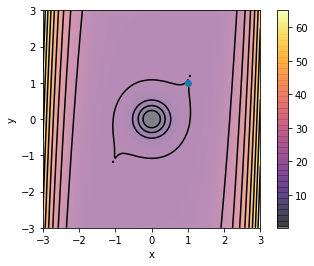

In [55]:
def f(x, b=20, w=10, q=0.1):
    return b*(1 - np.exp((-0.5*w*(x[0]**2 + x[1]**2)))) + 0.5*q*(-x[0]**3 + x[1])**2

def dx_f(x, b=20, w=10, q=0.1):
    return b*np.exp(-0.5*w*(x[0]**2 + x[1]**2))*w*x[0] - 3*q*(x[0]**2)*(-x[0]**3 + x[1])

def dy_f(x, b=20, w=10, q=0.1):
    return b*np.exp(-0.5*w*(x[0]**2 + x[1]**2))*w*x[1] + q*(-x[0]**3 + x[1])

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y, sparse=True)
z = f((X, Y))

plt.contour(x, y, z, 15, colors='black')
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='inferno', alpha=0.5, aspect=1)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
print(f((1,-1)))

20.19909200140475


theta_best: [1.03856596e-06 1.03856596e-06]
f(theta_best): 2.15776925985801e-10


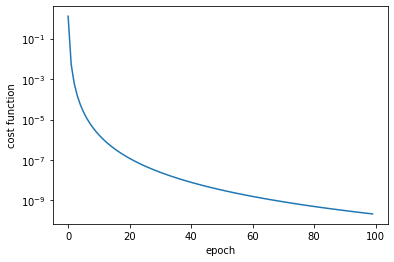

In [69]:
cost = []

def GD(theta, eta, epoch):
    theta_best = theta
    for i in range(0, epoch):
        theta_best = theta_best - (eta/(i+1))*np.array(dx_f(theta_best), dy_f(theta_best))
        cost.append(theta_best)
    return theta_best

theta_i = np.array([-0.1,-0.1])
theta_best = GD(theta_i, 0.01, 100)

print('theta_best:', theta_best)
print('f(theta_best):', f(theta_best))

plt.plot(np.arange(0, len(cost)), [f(x) for x in cost])
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.show()


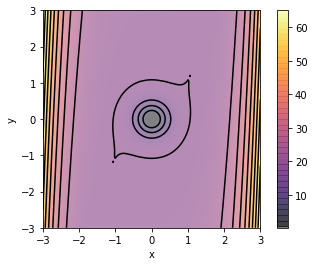

In [74]:
plt.contour(x, y, z, 15, colors='black')
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='inferno', alpha=0.5, aspect=1)
plt.colorbar()
plt.plot(cost[0], cost[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()